In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

In [2]:
titanic = pd.read_csv('train.csv')

titanic['Age'].fillna(0, inplace=True)

rep = {0: "Dead", 1: "Survived"}
titanic.replace({'Survived' : rep}, inplace=True)


In [3]:
def age_r(col, points, labels=None):
  minval = col.min()
  maxval = col.max()
  bp = [minval] + points + [maxval]
  if not labels:
    labels = range(len(points)+1)
  buffer = pd.cut(col,bins=bp,include_lowest=True)
  return buffer
  
pts = [1, 12, 21, 55 ]
labels = ["Unknown", "Child", "Teen", "Adult", "Old"]
titanic['Age'] = age_r(titanic['Age'], pts, labels)
print(titanic)

     PassengerId  Survived  Pclass  ...     Fare Cabin Embarked
0              1      Dead       3  ...   7.2500   NaN        S
1              2  Survived       1  ...  71.2833   C85        C
2              3  Survived       3  ...   7.9250   NaN        S
3              4  Survived       1  ...  53.1000  C123        S
4              5      Dead       3  ...   8.0500   NaN        S
..           ...       ...     ...  ...      ...   ...      ...
886          887      Dead       2  ...  13.0000   NaN        S
887          888  Survived       1  ...  30.0000   B42        S
888          889      Dead       3  ...  23.4500   NaN        S
889          890  Survived       1  ...  30.0000  C148        C
890          891      Dead       3  ...   7.7500   NaN        Q

[891 rows x 12 columns]


In [4]:
in_titanic = titanic[['Pclass','Age', 'Survived', 'Sex']]
in_titanic

,Pclass,Age,Survived,Sex
0,3,"(21.0, 55.0]",Dead,male
1,1,"(21.0, 55.0]",Survived,female
2,3,"(21.0, 55.0]",Survived,female
3,1,"(21.0, 55.0]",Survived,female
4,3,"(21.0, 55.0]",Dead,male
...,...,...,...,...
886,2,"(21.0, 55.0]",Dead,male
887,1,"(12.0, 21.0]",Survived,female
888,3,"(-0.001, 1.0]",Dead,female
889,1,"(21.0, 55.0]",Survived,male


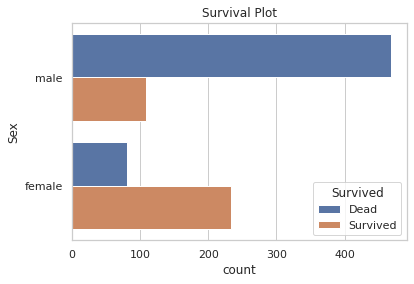

In [8]:
sns.set(style="whitegrid")
ax = sns.countplot(y='Sex', hue="Survived", data=titanic)
plt.ylabel('Sex')
plt.title('Survival Plot')
plt.show()

In [9]:
dataset = []
for i in range(0, in_titanic.shape[0]-1):
    dataset.append([str(in_titanic.values[i,j]) for j in range(0, in_titanic.shape[1])])

oht = TransactionEncoder()
oht_ary = oht.fit(dataset).transform(dataset)
df = pd.DataFrame(oht_ary, columns=oht.columns_)
df.head()

,"(-0.001, 1.0]","(1.0, 12.0]","(12.0, 21.0]","(21.0, 55.0]","(55.0, 80.0]",1,2,3,Dead,Survived,female,male
0,False,False,False,True,False,False,False,True,True,False,False,True
1,False,False,False,True,False,True,False,False,False,True,True,False
2,False,False,False,True,False,False,False,True,False,True,True,False
3,False,False,False,True,False,True,False,False,False,True,True,False
4,False,False,False,True,False,False,False,True,True,False,False,True


In [10]:
output = apriori(df, min_support=0.2, use_colnames=oht.columns_)

print ('Support of 0.2')
print(association_rules(output, 'support' , min_threshold=0.5))
print ('Confidence of 0.8')
print(association_rules(output, 'confidence' , min_threshold=0.8))


Support of 0.2
  antecedents consequents  antecedent support  ...      lift  leverage  conviction
0      (Dead)      (male)            0.615730  ...  1.316752  0.126224    2.386905
1      (male)      (Dead)            0.647191  ...  1.316752  0.126224    2.030636

[2 rows x 9 columns]
Confidence of 0.8
            antecedents consequents  ...  leverage  conviction
0                (Dead)      (male)  ...  0.126224    2.386905
1                (male)      (Dead)  ...  0.126224    2.030636
2  (Dead, (21.0, 55.0])      (male)  ...  0.069754    2.724469
3  (male, (21.0, 55.0])      (Dead)  ...  0.063669    1.960427
4             (3, Dead)      (male)  ...  0.066171    1.817946
5             (3, male)      (Dead)  ...  0.096581    2.828879

[6 rows x 9 columns]
